<a href="https://colab.research.google.com/github/chavamoon/MachineLearningExamples/blob/main/Clustering/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn.model_selection as skm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

In [4]:
np.random.seed(200804)

# EDA

In [5]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.rename(columns={ col: col.lower() for col in titanic.columns}, inplace = True )
titanic.dropna(inplace=True)

In [8]:
titanic.dtypes

passengerid      int64
survived         int64
pclass           int64
name            object
sex             object
age            float64
sibsp            int64
parch            int64
ticket          object
fare           float64
cabin           object
embarked        object
dtype: object

In [10]:
#masks for sex columns
titanic.sex.mask(titanic.sex == 'female', '1', inplace=True)
titanic.sex.mask(titanic.sex == 'male', '0', inplace=True)
titanic.sex = titanic.sex.astype('int')
titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S


In [12]:
titanic.describe()

,passengerid,survived,pclass,sex,age,sibsp,parch,fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,0.480874,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,0.501005,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,0.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,0.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,1.000000,80.000000,3.000000,4.000000,512.329200


In [14]:
#Removing string features 
dataset = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare
1,1,1,1,38.0,1,0,71.2833
3,1,1,1,35.0,1,0,53.1000
6,0,1,0,54.0,0,0,51.8625
10,1,3,1,4.0,1,1,16.7000
11,1,1,1,58.0,0,0,26.5500


## Data scaling

In [16]:
dataset_scaled = scale(dataset)
dataset_scaled[:4]

array([[ 0.6984303 , -0.37225618,  1.03901177,  0.14906507,  0.83362754,
        -0.63172982, -0.0971798 ],
       [ 0.6984303 , -0.37225618,  1.03901177, -0.0432295 ,  0.83362754,
        -0.63172982, -0.3359971 ],
       [-1.43178211, -0.37225618, -0.96245301,  1.17463611, -0.7230443 ,
        -0.63172982, -0.35225028],
       [ 0.6984303 ,  3.52047984,  1.03901177, -2.03027338,  0.83362754,
         0.69708118, -0.81407038]])

## Kmeans

In [19]:
#Hyper parameters:
#1. n_clustersint, default=8
#    The number of clusters to form as well as the number of centroids to generate.
#2. init{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’
#    Method for initialization:
#        ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.
#        ‘random’: choose n_clusters observations (rows) at random from data for the initial centroids.
#        If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.
#        If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.
#3. n_initint, default=10
#    Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
#4. max_iterint, default=300
#    Maximum number of iterations of the k-means algorithm for a single run.
kmeans_4 = KMeans(n_clusters=4, init='k-means++')

In [21]:
m_4 = kmeans_4.fit(dataset_scaled)

In [23]:
# First ten labels generated for kmeans
m_4.labels_[:10]

array([2, 2, 0, 1, 2, 1, 2, 3, 2, 0], dtype=int32)

In [25]:
#Coordenates for each group, depends of number of variables
m_4.cluster_centers_

array([[-1.38830838, -0.29281258, -0.88076057,  0.65203964, -0.2465121 ,
        -0.3605439 , -0.35931647],
       [ 0.14272271,  2.42035879,  0.16880969, -0.90437475, -0.18159322,
         0.11933727, -0.82579568],
       [ 0.6984303 , -0.37225618,  0.3956838 ,  0.09030839,  0.03675982,
        -0.39444214, -0.05288244],
       [ 0.22504976, -0.37225618,  0.22360019, -0.69389735,  0.48770047,
         1.77981608,  1.52007159]])

In [28]:
# Number of iterations
m_4.n_iter_

20

In [29]:
#Sum of squared errors
sse_4 = m_4.inertia_
sse_4

682.728522569098

## Metrics


### Cluster size

In [30]:
titanic['labels'] = m_4.labels_

In [35]:
titanic.groupby(by='labels', as_index=False)['survived'].count().rename(columns={'survived': 'count'})

,labels,count
0,0,49
1,1,23
2,2,84
3,3,27


### Elbow graph

In [51]:
def generate_groups(dataset_scaled, min_groupsize=2,max_group_size=10):
  cluster_number = []
  msse = []
  for i in range(min_groupsize, max_group_size+1):
    kmeans = KMeans(n_clusters=i)
    m = kmeans.fit(dataset_scaled)
    cluster_number.append(i)
    msse.append(m.inertia_)
  return {'n_cluster': cluster_number, 'sse':msse }

In [52]:
elbow_graph_data = generate_groups(dataset_scaled)
elbow_graph_data

{'n_cluster': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'sse': [1008.4981186659124,
  833.0838587719395,
  682.6546812321367,
  598.0977336499525,
  537.1042751925581,
  497.12484635059286,
  457.54145998007607,
  429.14516022613066,
  393.38497030748715]}

In [53]:
elbow_graph_df = pd.DataFrame.from_dict(elbow_graph_data)
elbow_graph_df

,n_cluster,sse
0,2,1008.498119
1,3,833.083859
2,4,682.654681
3,5,598.097734
4,6,537.104275
5,7,497.124846
6,8,457.541460
7,9,429.145160
8,10,393.384970


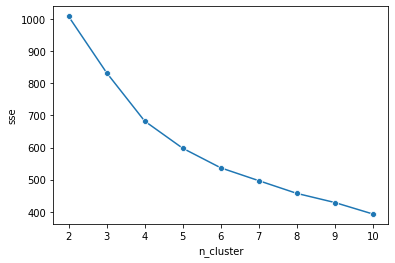

In [57]:
sns.lineplot(x= 'n_cluster', y='sse', data=elbow_graph_df, marker = 'o')

### Elbow graph If we only consider ticket fare and age as features

In [60]:
dataset_2 = dataset[['age','fare']]
dataset_2.head()

,age,fare
1,38.0,71.2833
3,35.0,53.1000
6,54.0,51.8625
10,4.0,16.7000
11,58.0,26.5500


In [63]:
dataset_scaled_2 = scale(dataset_2)
elbow_data_2= generate_groups(dataset_scaled_2)
elbow_graph_df_2 = pd.DataFrame.from_dict(elbow_data_2)
elbow_graph_df_2

,n_cluster,sse
0,2,240.189430
1,3,138.479735
2,4,107.334889
3,5,81.699724
4,6,67.784470
5,7,57.469123
6,8,48.252217
7,9,39.074061
8,10,33.774679


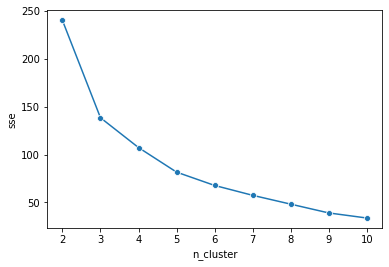

In [64]:
sns.lineplot(x= 'n_cluster', y='sse', data=elbow_graph_df_2, marker = 'o')

We can visualize an 'elbow' when n_cluster = 3

## Groups visualization

In [91]:
dataset_2.head()

,age,fare
1,38.0,71.2833
3,35.0,53.1000
6,54.0,51.8625
10,4.0,16.7000
11,58.0,26.5500


In [95]:
dataset_scaled_3 = scale(dataset_2)
dataset_scaled_3[:5]

array([[ 0.14906507, -0.0971798 ],
       [-0.0432295 , -0.3359971 ],
       [ 1.17463611, -0.35225028],
       [-2.03027338, -0.81407038],
       [ 1.43102886, -0.68470165]])

In [100]:
k_means_3 = KMeans(n_clusters=3) 
m_3 = k_means_3.fit(dataset_scaled_3)

In [110]:
results = pd.DataFrame({'age': dataset_scaled_3[:,0], 'fare': dataset_scaled_3[:,1]})
results['group'] = m_3.labels_
results['group'] = results['group'].astype('str')
results.head()

,age,fare,group
0,0.149065,-0.097180,2
1,-0.043230,-0.335997,1
2,1.174636,-0.352250,2
3,-2.030273,-0.814070,1
4,1.431029,-0.684702,2


In [112]:
centroids = pd.DataFrame({'age': m_3.cluster_centers_[:,0], 'fare': m_3.cluster_centers_[:,1]})
centroids['group'] = 'C'
centroids

,age,fare,group
0,-0.344868,2.491016,C
1,-0.691234,-0.271871,C
2,0.938599,-0.234259,C


In [113]:
df_to_graph = pd.concat([results,centroids])
df_to_graph

,age,fare,group
0,0.149065,-0.097180,2
1,-0.043230,-0.335997,1
2,1.174636,-0.352250,2
3,-2.030273,-0.814070,1
4,1.431029,-0.684702,2
...,...,...,...
181,-1.068801,-0.639390,1
182,-0.620113,-0.639390,1
0,-0.344868,2.491016,C
1,-0.691234,-0.271871,C


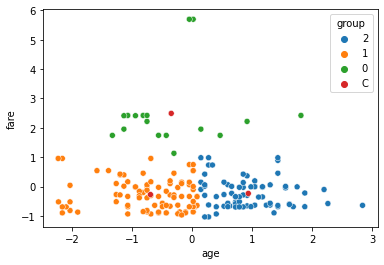

In [114]:
sns.scatterplot(x='age', y='fare', data=df_to_graph, hue='group')